# Song Genre Classification
## Part 1: Data Collection

### About:
- most data from  [AZLyrics Song Lyrics Dataset](https://www.kaggle.com/albertsuarez/azlyrics)
- rap lyrics from [Hip-Hop Encounters Data Science Dataset](https://www.kaggle.com/rikdifos/rap-lyrics
- folk + blues extra data from https://www.musixmatch.com
- genre classification from https://www.musixmatch.com

### Connect to musixmatch API

In [3]:
!pip install --quiet pymusixmatch

In [460]:
TOKEN = # your musixmatch API token

In [461]:
from musixmatch import Musixmatch


musixmatch = Musixmatch(TOKEN)

### Load data

In [98]:
import csv
import glob
from tqdm.auto import tqdm


def get_csv_file_list(unzipping_output_folder):
    """
    extract all the csv file paths given the folder path.
    :param 
        unzipping_output_folder: Folder path.
    :return: 
        list of CSV file paths.
    """
    csv_file_list = [i for i in glob.glob(f'{unzipping_output_folder}/**/*.csv')]
    print(f'{len(csv_file_list)} CSV files extracted.')
    return csv_file_list


def read(csv_file_list):
    """
    read the list of data CSVs.
    :param 
        csv_file_list: list of CSV file paths where the data is.
    :return: 
        CSVs read.
    """
    data = []
    total = 0
    for csv_file_name in tqdm(csv_file_list):
        with open(csv_file_name, 'r') as csv_file:
            rows = [row for row in csv.reader(csv_file) if row][1:]
            total += len(rows)
            data += rows
            print(f'{csv_file_name}: {len(rows)} songs.')
    print(f'Total: {total}')
    return data
            
            
data_folder = './'
csv_file_list = get_csv_file_list(data_folder)
data = read(csv_file_list)

27 CSV files extracted.


./azlyrics-scraper/azlyrics_lyrics_19.csv: 868 songs.
./azlyrics-scraper/azlyrics_lyrics_g.csv: 4542 songs.
./azlyrics-scraper/azlyrics_lyrics_p.csv: 5578 songs.
./azlyrics-scraper/azlyrics_lyrics_q.csv: 386 songs.
./azlyrics-scraper/azlyrics_lyrics_f.csv: 2450 songs.
./azlyrics-scraper/azlyrics_lyrics_d.csv: 6349 songs.
./azlyrics-scraper/azlyrics_lyrics_s.csv: 12703 songs.
./azlyrics-scraper/azlyrics_lyrics_r.csv: 3757 songs.
./azlyrics-scraper/azlyrics_lyrics_e.csv: 5414 songs.
./azlyrics-scraper/azlyrics_lyrics_v.csv: 1432 songs.
./azlyrics-scraper/azlyrics_lyrics_a.csv: 13046 songs.
./azlyrics-scraper/azlyrics_lyrics_w.csv: 4697 songs.
./azlyrics-scraper/azlyrics_lyrics_u.csv: 877 songs.
./azlyrics-scraper/azlyrics_lyrics_b.csv: 22672 songs.
./azlyrics-scraper/azlyrics_lyrics_c.csv: 10296 songs.
./azlyrics-scraper/azlyrics_lyrics_t.csv: 5157 songs.
./azlyrics-scraper/azlyrics_lyrics_y.csv: 1183 songs.
./azlyrics-scraper/azlyrics_lyrics_n.csv: 3052 songs.
./azlyrics-scraper/azlyric

In [123]:
import pandas as pd


data = pd.DataFrame(data)
data = data[[0, 1, 2, 3, 4]]

In [125]:
data = data.rename(columns={0:'author', 
                            1: 'author_url', 
                            2: 'song',
                            3: 'song_url',
                            4: 'lyrics'})

In [127]:
data.head()

author                                 author_url                song  \
0  03 greedo  https://www.azlyrics.com/19/03greedo.html          sweet lady   
1  03 greedo  https://www.azlyrics.com/19/03greedo.html      mafia business   
2  03 greedo  https://www.azlyrics.com/19/03greedo.html            paranoid   
3  03 greedo  https://www.azlyrics.com/19/03greedo.html          never bend   
4  03 greedo  https://www.azlyrics.com/19/03greedo.html  prayer for my lost   

                                            song_url  \
0  https://www.azlyrics.com/lyrics/03greedo/sweet...   
1  https://www.azlyrics.com/lyrics/03greedo/mafia...   
2  https://www.azlyrics.com/lyrics/03greedo/paran...   
3  https://www.azlyrics.com/lyrics/03greedo/never...   
4  https://www.azlyrics.com/lyrics/03greedo/praye...   

                                              lyrics  
0  its only one, 03, i'm from grape street, where...  
1  you gonna make me put you in a suit and tie, s...  
2  we could kill it, yeah, we could, we could, we...  
3  yeah, you lil bitch ass niggas steady speaking...  
4  x loaded up bro, never see me in the church, p...

In [189]:
data.to_csv('org_data.csv', index=False)

### Get genre classification

In [1]:
from langdetect import detect


def get_lang(lyrics):
    """
    detect the language of the song
    :param 
        lyrics: song lyrics in string format
    :return:
        bool whether the language is english
    """
    try:
        lang = detect(lyrics[:100])
        return lang == 'en'
    except:
        return False
    

def get_genre(song):
    """
    get genre classification
    :return: 
        genre of the song
        or False if genre is not in the list
    """
    genres = ['Pop', 'Rock', 'Rap', 'Blues', 'Country', 'Funk', 'Music']
    
    song = song['music_genre_list']
    song_genres = []
    for genre in song:
        g = genre['music_genre']['music_genre_name']
        if g in genres:
            song_genres.append(g)
    if len(song_genres) > 1 and song_genres[0] == 'Music':
        return song_genres[1]
    else:
        return song_genres[0] if len(song_genres) > 0 else False
    
    
def find_song(row): 
    """
    get genre of the song
    """
    song_data = musixmatch.track_search(q_track=row['song'],
                                        q_artist=row['author'], 
                                        page_size=1, 
                                        page=1, 
                                        s_track_rating='desc')
    try:
        song = song_data['message']['body']['track_list'][0]['track']['primary_genres']
        genre = get_genre(song)
        return genre
    except:
        return False

In [2]:
new_data = []

In [ ]:
banned_artists = ['2ne1']  # weird lyrics, we want to avoid them
i = 84428  # index of the last song collected: as the token allows only for 2000 queries a day
for ind, song in tqdm(data.loc[i:].iterrows(), total=len(data[i:])):
    if song['author'] not in banned_artists and get_lang(song['lyrics'][:100]):
        genre = find_song(song)
        if genre:
            new_data.append((song['author'], song['song'], song['lyrics'], genre))

In [197]:
len(new_data)

8993

In [198]:
COLUMNS = ['author', 'song', 'lyrics', 'genre']
clean_data = pd.DataFrame(new_data, columns=COLUMNS)

In [199]:
clean_data

author                 song  \
0                 911           wonderland   
1            2 chainz                intro   
2            2 chainz               cowboy   
3            2 chainz             too easy   
4            2 chainz             gasolean   
...               ...                  ...   
8988  richards, keith           big enough   
8989  richards, keith      make no mistake   
8990     robin thicke     top of the world   
8991     robin thicke             pressure   
8992     robin thicke  give it 2 u (remix)   

                                                 lyrics  genre  
0     wey-oh, wey-oh, we'll be as one in wonder, won...   Rock  
1     dj technik mixtape mastermind, trap check. tra...  Music  
2     it's all the same, only the names will change,...  Music  
3     , the shit to easy bro, its too fucking easy, ...  Music  
4     see i be rocking truey and my belt by louie, i...  Music  
...                                                 ...    ...  
8988  no time for weepin' baby, no tears need flow, ...   Rock  
8989  make no mistake about it mm, but things ain't ...   Rock  
8990  come on come on, now you feeling like a pimp, ...    Pop  
8991  , say, the pressure's plain to see yea, writte...    Pop  
8992  ], okay baby, all i gotta say baby, that's rob...    Pop  

[8993 rows x 4 columns]

In [200]:
clean_data.to_csv('./data/data_1.csv', index=False)

### Combine data

In [262]:
data = pd.read_csv('./data/data_1.csv')
extra_data = pd.read_csv('./data/data_2.csv')  # more loaded data

In [263]:
data = pd.concat([data, extra_data])

In [264]:
data

author                       song  \
0                911                 wonderland   
1           2 chainz                      intro   
2           2 chainz                     cowboy   
3           2 chainz                   too easy   
4           2 chainz                   gasolean   
...              ...                        ...   
25647  lynn anderson                        cry   
25648  lynn anderson  never ending song of love   
25649  lynn anderson              bedtime story   
25650  lynn anderson          reason to believe   
25651  lynn anderson   if i can't be your woman   

                                                  lyrics    genre  
0      wey-oh, wey-oh, we'll be as one in wonder, won...     Rock  
1      dj technik mixtape mastermind, trap check. tra...    Music  
2      it's all the same, only the names will change,...    Music  
3      , the shit to easy bro, its too fucking easy, ...    Music  
4      see i be rocking truey and my belt by louie, i...    Music  
...                                                  ...      ...  
25647  if your sweetheart sends a letter of goodbye, ...  Country  
25648  i've got a never ending love for you, from now...  Country  
25649  i've told you almost every bedtime story, and ...  Country  
25650  if i listened long enough to you, i'd find the...    Music  
25651  young girls think love can be found any night,...    Music  

[34645 rows x 4 columns]

### Add more Rap, Folk and Blues song lyrics

In [427]:
def find_songs(artist='', page_num=1, primary_genre=''):
    """
    find songs by genre/artist
    :param
        artist: name of the artist to search
        page_num: number of the search result page
        primary_genre: genre to search
    :return:
        a list of songs and their attributes
    """
    song_data = musixmatch.track_search(q_track='',
                                        q_artist=artist, 
                                        page_size=100, 
                                        page=page_num, 
                                        s_track_rating='desc')
    
    songs = song_data['message']
    songs = songs['body']
    data = []
    if len(songs) != 0:
        songs = songs['track_list']
        for song in songs:
            if song['track']['has_lyrics'] == 1:  # if a song has lyrics
                genre = primary_genre
                track_id = song['track']['track_id']
                lyrics = musixmatch.track_lyrics_get(track_id=track_id)['message']['body']  # get lyrics
                if len(lyrics) != 0:  # avoid mistakes in annotation
                    lyrics = lyrics['lyrics']['lyrics_body']
                    lyrics = lyrics.split('*******', maxsplit=1)[0].strip()  # data format 
                    data.append((song['track']['artist_name'].lower(), 
                                 song['track']['track_name'], 
                                 lyrics, 
                                 genre))
    return data

Lists of artists:

In [462]:
folk_artists = ['The Alamanac Singers', 'Ani DiFranco', 'Ben Harper', 'Bob Dylan', 'The Carter Family', 'Cat Stevens']
blues_artists = ['Sena Ehrhardt', 'Josh Smith', 'Philip Sayce', 
                 'Philip Sayce', 'Roy Rogers', 'Cootie Stark', 
                 'Melvin Taylor', 'Ron Thompson', 'Mike Wheeler', 
                 'Angela Strehli', 'Tony Spinner', 'Sean Chambers', 
                 'Henrik Freischlader', 'Ana Popovic']

In [463]:
extra_folk = []
for artist in tqdm(folk_artists):  # downloading extra data
    for i in range(100):
        extra_folk.extend(find_songs(artist=artist, page_num=i, primary_genre='Folk'))

In [464]:
extra_folk = pd.DataFrame(extra_folk, columns=COLUMNS).drop_duplicates(keep='first')
extra_folk

author  \
0                               the almanac singers   
1                               the almanac singers   
2                               the almanac singers   
3                               the almanac singers   
4                               the almanac singers   
...                                             ...   
4837                                    cat stevens   
4838                                    cat stevens   
4839                                    cat stevens   
4840  simtech productions feat. yusuf / cat stevens   
4841                                    cat stevens   

                                                 song  \
0                             House Of The Rising Sun   
1                              Which Side are You On?   
2                                          Plow Under   
3                                       Talking Union   
4     I Don't Want Your Millions, Mister (All I Want)   
...                                               ...   
4837                     Ceylon City - Stereo Version   
4838                               A Bad Penny - Live   
4839                 Don't Be Shy (alternate version)   
4840      Our Guide Is the Quraan (feat. Yusuf Islam)   
4841                     Heaven/ Where True Love Goes   

                                                 lyrics genre  
0     There is a house in New Orleans\nThey call the...  Folk  
1     Come, all you good workers\nGood news to you I...  Folk  
2     Remember when the AAA,\nKilled a million hogs ...  Folk  
3     Now, if you want higher wages let me tell you ...  Folk  
4     I don't want your millions, Mister,\nI don't w...  Folk  
...                                                 ...   ...  
4837  I'm going home to the town where I was born\nW...  Folk  
4838  Oh dont say those same idle lies\nI've heard t...  Folk  
4839  Don't be shy, just let your feelings roll on b...  Folk  
4840  All Muslims have to do five things\nWho knows ...  Folk  
4841  The moment you walked inside my door\nI knew t...  Folk  

[4366 rows x 4 columns]

In [466]:
extra_blues = []
for artist in tqdm(blues_artists):  # downloading extra data
    for i in range(50):
        extra_blues.extend(find_songs(artist=artist, page_num=i, primary_genre='Blues'))

In [467]:
extra_blues = pd.DataFrame(extra_blues, columns=COLUMNS)
extra_blues = extra_blues.drop_duplicates(keep='first')
extra_blues

author  \
0                     sena ehrhardt   
1                     sena ehrhardt   
4           disero feat. josh smith   
5    josh powell feat. fraser smith   
6    josh powell feat. fraser smith   
..                              ...   
514                     ana popovic   
515    ana popovic & milton popovic   
516                     ana popovic   
517                     ana popovic   
518                     ana popovic   

                                                  song  \
0                                         On the Clock   
1                                         Buried Alive   
4                                            Like That   
5                                               Always   
6                              Leave Me as You Find Me   
..                                                 ...   
514                                      Soulful Dress   
515                                    Evening Shadows   
516                                             Mended   
517                                  Minute 'Till Dawn   
518  Count Me In - Live at The Mahindra Blues Festi...   

                                                lyrics  genre  
0    Every day's our new chance to get it right in ...  Blues  
1    Ich kann nicht schlafen, ich kann nicht atmen,...  Blues  
4    When we had that feeling\nThe stars were our c...  Blues  
5    I believe in the light I've seen\nAnd the life...  Blues  
6    All ready for letting go\nNothing left to remi...  Blues  
..                                                 ...    ...  
514  I'm gonna put on my dress\nWith that slip way ...  Blues  
515  When evening shadows fall\nMinutes seem so lon...  Blues  
516  You crushed my world\nThe day you went away.\n...  Blues  
517  If we look back on time gone past\nBad moves b...  Blues  
518  If you're looking for some action\nOr just way...  Blues  

[276 rows x 4 columns]

In [483]:
data = pd.concat([data, extra_folk, extra_blues], ignore_index=True)

Get rap lyrics:

In [484]:
rap = os.listdir('./rap_lyrics')

rap_data = []
for file in tqdm(rap):  # downloading extra data
    if file.endswith('.txt'):
        with open('./rap_lyrics/'+file, encoding='utf-8') as fid:
            text = fid.read()
        artist = file.strip('_lyrics.txt').replace('_', ' ').lower()
        songs = text.split('\n\n')
        for i, song in enumerate(songs):
            rap_data.append((artist, f'unk{i}', song, 'Rap'))

In [485]:
len(rap_data)

10262

In [486]:
data = data[data['genre'] != 'Rap']  # to avoid duplicates

In [487]:
rap_data = pd.DataFrame(rap_data, columns=COLUMNS)
data = pd.concat([data, rap_data], ignore_index=True).drop_duplicates(keep='first')

In [488]:
data

author        song  \
0                   911  wonderland   
1              2 chainz       intro   
2              2 chainz      cowboy   
3              2 chainz    too easy   
4              2 chainz    gasolean   
...                 ...         ...   
45432  childish gambino      unk277   
45433  childish gambino      unk278   
45434  childish gambino      unk279   
45435  childish gambino      unk280   
45436  childish gambino      unk281   

                                                  lyrics  genre  
0      wey - oh , wey - oh , we 'll be as one in wond...   Rock  
1      dj technik mixtape mastermind , trap check . t...  Music  
2      it 's all the same , only the names will chang...  Music  
3      , the shit to easy bro , its too fucking easy ...  Music  
4      see i be rocking truey and my belt by louie , ...  Music  
...                                                  ...    ...  
45432  Ba-b-ba-b-ba-ba\nDuh-d-duh-duh-d-duh\nDuh-duh-...    Rap  
45433  Childish Gambino, lame niggas never heard of i...    Rap  
45434  Runnin’ through the moment as the sun goes dow...    Rap  
45435  Gambeezy make it work somethin’, let me check ...    Rap  
45436  Running through the moment as the sun goes dow...    Rap  

[45437 rows x 4 columns]

In [489]:
data.genre.value_counts()

Pop        11987
Rock       11311
Rap        10262
Country     5307
Folk        4366
Music       1541
Blues        644
Funk          19
Name: genre, dtype: int64

### Part 2: Preprocessing
#### Tokenization

In [3]:
import pandas as pd

In [24]:
data = pd.read_csv('./RS/data/final_data.csv')

In [25]:
data

subset                  author                    song    genre  \
0         tr        chance the rappe                  unk228      Rap   
1         tr             megan & liz                love war  Country   
2         tr              jamiroquai   if i like it, i do it      Pop   
3         tr                   drake                  unk172      Rap   
4         tr                  j cole                  unk152      Rap   
...      ...                     ...                     ...      ...   
20577     te        tyler the creato                  unk103      Rap   
20578     te               talib kwe                   unk54      Rap   
20579     te  nitty gritty dirt band  you don't know my mind  Country   
20580     te           martin, ricky                    vida      Pop   
20581     te               talib kwe                  unk189      Rap   

                                                  lyrics  \
0      Another weekend full of blunts and brews\nToo ...   
1      i do n't believe in wizards or witches , but b...   
2      if i like it i just do it , say that we have a...   
3      Done sayin' I'm done playin'\nLast time was on...   
4      This next three bars is dedicated to the retar...   
...                                                  ...   
20577  "Can't they just be happy for me like, a kid w...   
20578  To the mothers (they neglected) to the fathers...   
20579  honey you do n't know my mind i 'm lonesome al...   
20580  finally the time has come , let 's just dance ...   
20581  Hole up\nI realized early that black girls car...   

                                               tokenized  length  mean_depth  
0      Another weekend full of blunts and brews \n To...     166   68.000000  
1      i do n't believe in wizards or witches , but b...     210   13.200000  
2      if i like it i just do it , say that we have a...     332   29.750000  
3      Done sayin ' I 'm done playin ' \n Last time w...     271   33.666667  
4      This next three bars is dedicated to the retar...     121   48.000000  
...                                                  ...     ...         ...  
20577  " Ca n't they just be happy for me like , a ki...     152    4.909091  
20578  To the mothers ( they neglected ) to the fathe...     220   83.000000  
20579  honey you do n't know my mind i ' m lonesome a...     194   69.000000  
20580  finally the time has come , let 's just dance ...     368  131.000000  
20581  Hole up \n I realized early that black girls c...     147   30.500000  

[20582 rows x 8 columns]

In [26]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

In [27]:
def preprocess(text):
    """
    tokenize text
    :param
        text: lyrics in string format
    :return:
        tokenized text
    """
    return ' '.join([token.text for token in nlp(text)])

In [28]:
data['tokenized'] = data['lyrics'].apply(preprocess)

#### Cleaning data:
- dropping None values
- dropping Funk songs (as there is too little of them)
- dropping songs with lyrics length < 20 words

In [29]:
data = data.drop_duplicates('tokenized', keep='first').dropna()
data = data[~data['genre'].isin(['Funk', 'Music'])] 

In [30]:
def get_length(song):
    """
    calculate lyrics' length by tokens
    :param
        song: lyrics in string format
    :return:
        song lenth int value
    """
    try:
        length = len(song.split())
    except AttributeError:
        length = 0 
    return length

In [31]:
data['length'] = data['tokenized'].apply(get_length)

In [34]:
data = data[data['length'] > 20]

Order columns

In [40]:
data = data[['author', 'song', 'lyrics', 'genre', 'tokenized', 'length']]
data

author                    song  \
0            chance the rappe                  unk228   
1                 megan & liz                love war   
2                  jamiroquai   if i like it, i do it   
3                       drake                  unk172   
4                      j cole                  unk152   
...                       ...                     ...   
20577        tyler the creato                  unk103   
20578               talib kwe                   unk54   
20579  nitty gritty dirt band  you don't know my mind   
20580           martin, ricky                    vida   
20581               talib kwe                  unk189   

                                                  lyrics    genre  \
0      Another weekend full of blunts and brews\nToo ...      Rap   
1      i do n't believe in wizards or witches , but b...  Country   
2      if i like it i just do it , say that we have a...      Pop   
3      Done sayin' I'm done playin'\nLast time was on...      Rap   
4      This next three bars is dedicated to the retar...      Rap   
...                                                  ...      ...   
20577  "Can't they just be happy for me like, a kid w...      Rap   
20578  To the mothers (they neglected) to the fathers...      Rap   
20579  honey you do n't know my mind i 'm lonesome al...  Country   
20580  finally the time has come , let 's just dance ...      Pop   
20581  Hole up\nI realized early that black girls car...      Rap   

                                               tokenized  length  
0      Another weekend full of blunts and brews \n To...     166  
1      i do n't believe in wizards or witches , but b...     210  
2      if i like it i just do it , say that we have a...     332  
3      Done sayin ' I 'm done playin ' \n Last time w...     271  
4      This next three bars is dedicated to the retar...     121  
...                                                  ...     ...  
20577  " Ca n't they just be happy for me like , a ki...     152  
20578  To the mothers ( they neglected ) to the fathe...     220  
20579  honey you do n't know my mind i ' m lonesome a...     194  
20580  finally the time has come , let 's just dance ...     368  
20581  Hole up \n I realized early that black girls c...     147  

[20582 rows x 6 columns]

### Split to train/test
<code>GroupKFold</code> to ensure ther is no artist overlap between splits => avoid overfitting as artists are typically prone to one particular genre

In [79]:
from sklearn.utils import shuffle
from sklearn.model_selection import GroupKFold, train_test_split
import numpy as np


group_kfold = GroupKFold(n_splits=2)
columns = data.columns.tolist()#['author', 'song', 'lyrics', 'genre', 'tokenized', 'length']


def get_sample(data, subset, col):
    """
    Fold data with no overlap in column col
    :param
        data: pd.DataFrame to split
        subset: subset to add data to
        col: column to split by
        
    """
    for subset_ind, other_ind in group_kfold.split(data, groups=data[col]):
        X_subset, X_other = np.array(data)[subset_ind], np.array(data)[other_ind]
    subset.extend(X_subset)
    return subset, X_other



def split_data(data, col, coef, columns=columns):
    """
    split dataset into train, test and dev
    using GroupKFold
    :param
        data: pd.DataFrame to split
        col: column to split by
        coef: persentage of train sample
        columns: columns' names
    :return:
        splitted subsets
    """
    train, test = [], []
    train, left = get_sample(data, train, col=col)
    while len(train)/len(data) < coef:
        left = pd.DataFrame(left, columns=columns)
        train, left = get_sample(left, train, col=col)
    else:
        left = pd.DataFrame(left, columns=columns)
        test, dev = get_sample(left, test, col=col)
    return train, test, dev

In [80]:
train, test, dev = split_data(data, col='author', coef=0.7, columns=columns)

In [81]:
train = pd.DataFrame(train, columns=columns)
train['subset'] = 'tr'

In [82]:
test = pd.DataFrame(test, columns=columns)
test['subset'] = 'te'

In [83]:
dev = pd.DataFrame(dev, columns=columns)
dev['subset'] = 'va'

In [84]:
train.genre.value_counts()

Rap        4345
Country    3444
Rock       2675
Folk       2476
Pop        2113
Blues       385
Name: genre, dtype: int64

In [85]:
test.genre.value_counts()

Rap        1031
Country     704
Pop         514
Rock        265
Folk         35
Blues        24
Name: genre, dtype: int64

In [86]:
dev.genre.value_counts()

Country    760
Rap        605
Rock       429
Folk       419
Pop        302
Blues       57
Name: genre, dtype: int64

#### Balance classes

In [87]:
data = pd.concat([train, test, dev], ignore_index=True)

In [99]:
data = data[['subset', 'author', 'song', 'lyrics', 'genre', 'tokenized', 'length']]  # to change the order
data

subset                   author  \
0         tr                bob dylan   
1         tr            isaiah rashad   
2         tr             jamie lawson   
3         tr                 aap rock   
4         tr     pointer sisters, the   
...      ...                      ...   
20578     va  roy rogers & dale evans   
20579     va  roy rogers & dale evans   
20580     va  roy rogers & dale evans   
20581     va  roy rogers & dale evans   
20582     va  roy rogers & dale evans   

                                                    song  \
0                                     Black Cross (Live)   
1                                                 unk174   
2                                             a darkness   
3                                                  unk83   
4                                      shut up and dance   
...                                                  ...   
20578                                         Cool Water   
20579                                  Home on the Range   
20580  Remember Whose Birthday It Is / Happy Birthday...   
20581                                       Happy Trails   
20582                                         Cool Water   

                                                  lyrics  genre  \
0      This is the story of Hezekiah Jones...\n\nHeze...   Folk   
1      My niggas die for it, she got that pussy juice...    Rap   
2      there 's a darkness in between us , a darkness...    Pop   
3      Tell me why these little niggas talking like t...    Rap   
4      hey you , you wanna dance ? , all i want to do...    Pop   
...                                                  ...    ...   
20578  Cool Water\nAll day I faced the barren waste\n...  Blues   
20579  Oh, give me a home where the buffalo roam\nWhe...  Blues   
20580  Happy birthday to you ...\nThis is for you\nI ...  Blues   
20581  Happy trails to you, until we meet again\nHapp...  Blues   
20582  Cool Water\nAll day I faced the barren waste\n...  Blues   

                                               tokenized length  
0      This is the story of Hezekiah Jones ... \n\n H...    144  
1      My niggas die for it , she got that pussy juic...    107  
2      there 's a darkness in between us , a darkness...    363  
3      Tell me why these little niggas talking like t...    110  
4      hey you , you wanna dance ? , all i want to do...    508  
...                                                  ...    ...  
20578  Cool Water \n All day I faced the barren waste...     72  
20579  Oh , give me a home where the buffalo roam \n ...     61  
20580  Happy birthday to you ... \n This is for you \...     22  
20581  Happy trails to you , until we meet again \n H...     49  
20582  Cool Water \n All day I faced the barren waste...     72  

[20583 rows x 7 columns]

### Visualization

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

style.use('seaborn')

In [91]:
def plot_train_test(data):
    """
    plot subset distribution pie chart
    :param
        data: pd.DaraFrame
    """
    bins = [data[data['subset']==i].count()['length'] for i in ['tr', 'te', 'va']]
    plt.pie(bins, labels=['tr', 'te', 'va'], autopct='%1.1f%%')

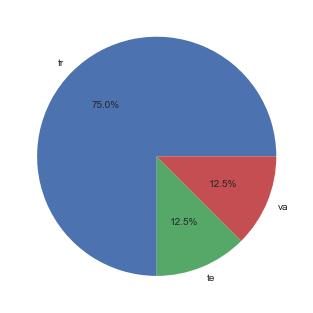

In [92]:
plot_train_test(data)

In [93]:
def plot_feature(data, feature):
    """
    plot feature distribution bar plots and py charts
    by subset and overall
    :param
        data: pd.DataFrame
        feature: feature to plot
    """
    classes = set(data[feature].to_list())

    fig, axs = plt.subplots(2, 4, figsize=(20, 10))

    for i, sub in enumerate(['tr', 'te', 'va', 'all']):
        if sub == 'all':
            bins = [data[data[feature] == j].count()['length'] for j in classes]
        else:
            bins =  [data[(data[feature] == j) & 
                          (data['subset'] == sub)
                          ].count()['length'] for j in classes]

        axs[0][i].bar(range(len(classes)), bins)
        axs[0][i].set_title('Subject distribution in {} data'.format(sub))
        axs[1][i].pie(bins, labels=classes, autopct='%1.1f%%')

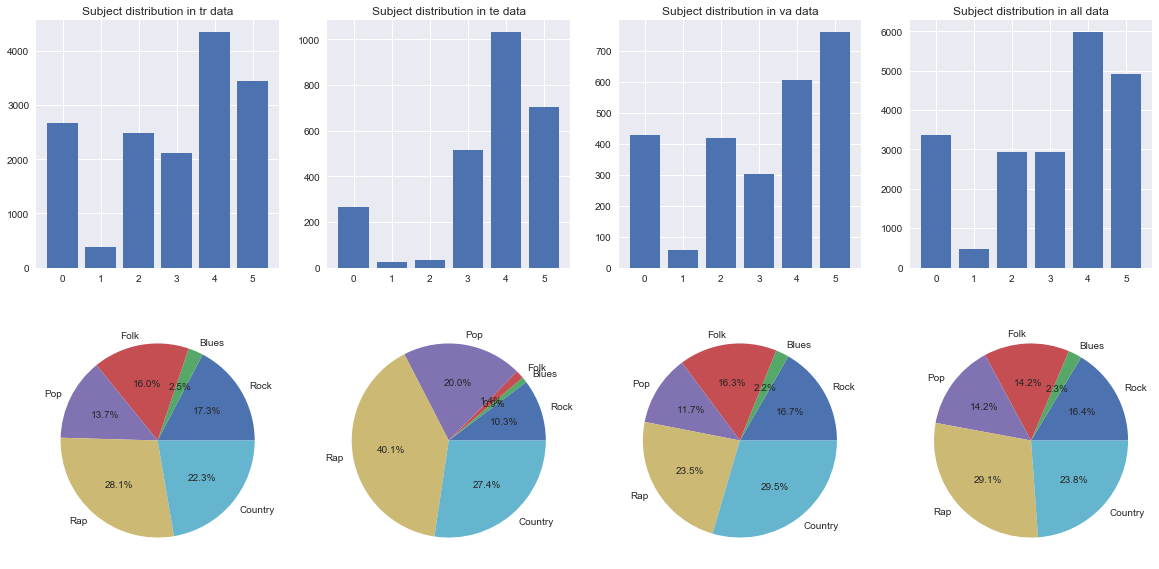

In [94]:
plot_feature(data, 'genre')

In [95]:
def plot_dist(data, feature):
    """
    plot distribution of a given feature
    :param
        data: pd.DataFrame
        feature: feature to plot distribution of
    """
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))
    
    for i, sub in enumerate(['tr', 'te', 'va', 'all']):
        if sub == 'all':
            df = data[feature]
        else:
            df = data[data['subset']==sub][feature]

        sns.distplot(df, bins=20, color='green', ax=axs[i])
        axs[i].axvline((df).mean(), 
                        color='k', 
                        linestyle='dashed', 
                        linewidth=1, 
                        label='mean')
        axs[i].axvline((df).median(), 
                        color='b', 
                        linestyle='dashed', 
                        linewidth=1, 
                        label='median')
        axs[i].legend()
        axs[i].set(title="{} distribution in {} data, song".format(feature,sub))
    plt.show()

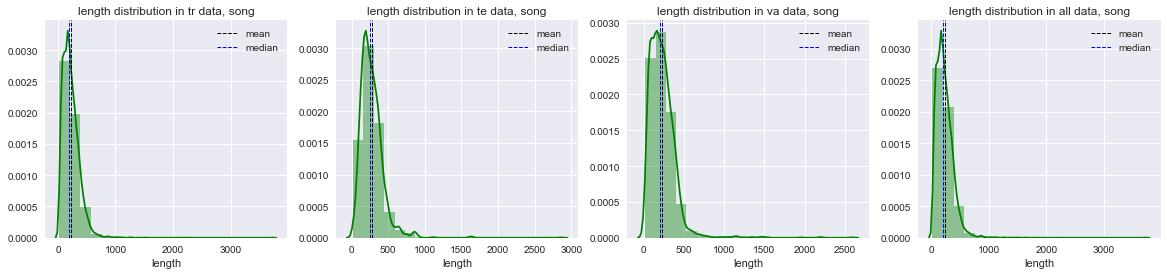

In [96]:
plot_dist(data, 'length')

In [100]:
data.to_csv('./RS/data/final_data.csv', index=False)